In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
df['Species'] = encoder.fit_transform(df['Species'])

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [11]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

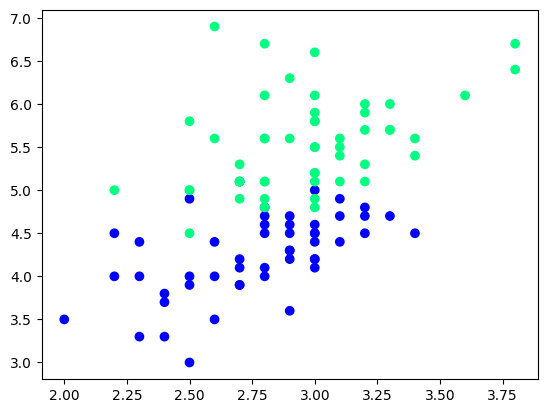

In [13]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [14]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
103,2.9,5.6,2
99,2.8,4.1,1
104,3.0,5.8,2
106,2.5,4.5,2
97,2.9,4.3,1
77,3.0,5.0,1
78,2.9,4.5,1
83,2.7,5.1,1
50,3.2,4.7,1
76,2.8,4.8,1


In [15]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [16]:
df_train

,SepalWidthCm,PetalLengthCm,Species
65,3.1,4.4,1
106,2.5,4.5,2
55,2.8,4.5,1
103,2.9,5.6,2
67,2.7,4.1,1
64,2.9,3.6,1
109,3.6,6.1,2
143,3.2,5.9,2
121,2.8,4.9,2
61,3.0,4.2,1


In [17]:
df_val

,SepalWidthCm,PetalLengthCm,Species
73,2.8,4.7,1
125,3.2,6.0,2
118,2.6,6.9,2
92,2.6,4.0,1
59,2.7,3.9,1


In [18]:
df_test

,SepalWidthCm,PetalLengthCm,Species
102,3.0,5.9,2
63,2.9,4.7,1
53,2.3,4.0,1
137,3.1,5.5,2
74,2.9,4.3,1


In [19]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [20]:
y_test

array([1, 2, 2, 1, 1])

## Case 1 - Bagging

In [22]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
64,2.9,3.6,1
65,3.1,4.4,1
64,2.9,3.6,1
121,2.8,4.9,2
65,3.1,4.4,1
103,2.9,5.6,2
61,3.0,4.2,1
143,3.2,5.9,2


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [25]:
dt_bag1 = DecisionTreeClassifier()

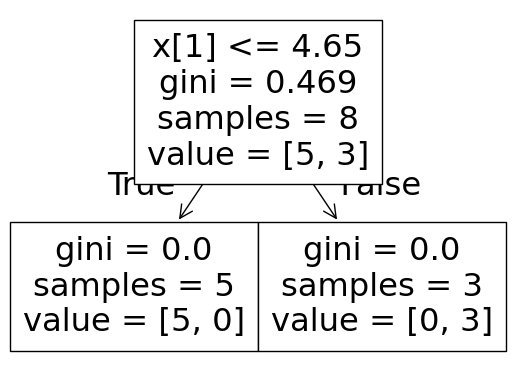

C:\jupyter\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\jupyter\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


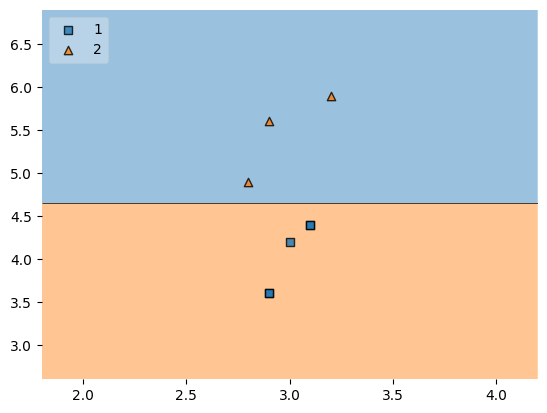

In [28]:
evaluate(dt_bag1,X,y)

In [29]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
109,3.6,6.1,2
103,2.9,5.6,2
103,2.9,5.6,2
143,3.2,5.9,2
65,3.1,4.4,1
109,3.6,6.1,2
65,3.1,4.4,1
143,3.2,5.9,2


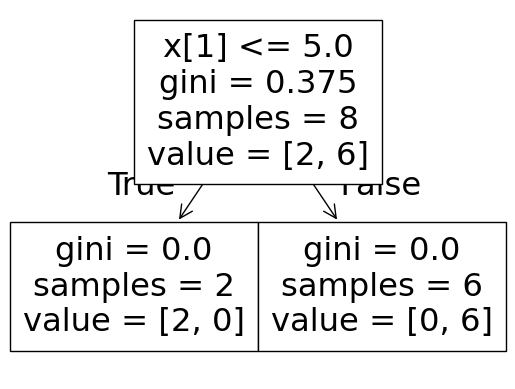

C:\jupyter\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\jupyter\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


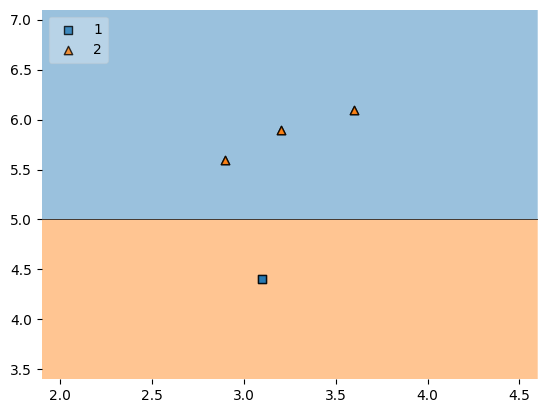

In [30]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [31]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
109,3.6,6.1,2
103,2.9,5.6,2
103,2.9,5.6,2
121,2.8,4.9,2
65,3.1,4.4,1
121,2.8,4.9,2
143,3.2,5.9,2
67,2.7,4.1,1


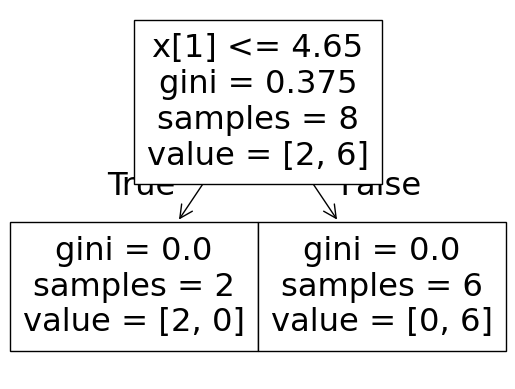

0.8


C:\jupyter\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\jupyter\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


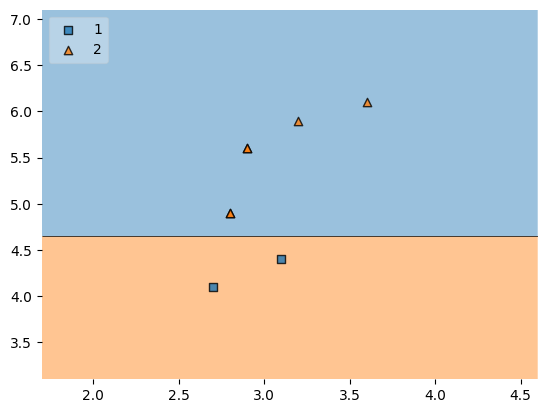

In [32]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [27]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

## Predict

In [33]:
df_test

,SepalWidthCm,PetalLengthCm,Species
102,3.0,5.9,2
63,2.9,4.7,1
53,2.3,4.0,1
137,3.1,5.5,2
74,2.9,4.3,1


In [35]:
print("Predictor 1",dt_bag1.predict(np.array([3.1,5.5]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.1,5.5]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.1,5.5]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\jupyter\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\jupyter\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\jupyter\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Pasting

In [36]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
65,3.1,4.4,1
106,2.5,4.5,2
55,2.8,4.5,1
103,2.9,5.6,2
67,2.7,4.1,1
64,2.9,3.6,1
109,3.6,6.1,2
143,3.2,5.9,2
121,2.8,4.9,2
61,3.0,4.2,1


In [37]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
65,3.1,4.4,1
143,3.2,5.9,2
64,2.9,3.6,1
121,2.8,4.9,2
103,2.9,5.6,2
109,3.6,6.1,2
61,3.0,4.2,1
106,2.5,4.5,2


## Random Subspaces

In [38]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [39]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
48,49,5.3,3.7,1.5,0.2,Iris-setosa
148,149,6.2,3.4,5.4,2.3,Iris-virginica
2,3,4.7,3.2,1.3,0.2,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
42,43,4.4,3.2,1.3,0.2,Iris-setosa
137,138,6.4,3.1,5.5,1.8,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
108,109,6.7,2.5,5.8,1.8,Iris-virginica


In [40]:
df1.sample(2,replace=True,axis=1)

,SepalLengthCm,Id
48,5.3,49
148,6.2,149
2,4.7,3
29,4.7,30
77,6.7,78
52,6.9,53
42,4.4,43
137,6.4,138
143,6.8,144
108,6.7,109


## Random Patches

In [41]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
48,49,5.3,3.7,1.5,0.2,Iris-setosa
148,149,6.2,3.4,5.4,2.3,Iris-virginica
2,3,4.7,3.2,1.3,0.2,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
42,43,4.4,3.2,1.3,0.2,Iris-setosa
137,138,6.4,3.1,5.5,1.8,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
108,109,6.7,2.5,5.8,1.8,Iris-virginica


In [42]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Id,PetalLengthCm
48,49,1.5
143,144,5.9
29,30,1.6
108,109,5.8
148,149,5.4
77,78,5.0
29,30,1.6
108,109,5.8
